In [1]:
import pandas as pd
import geopandas as gpd
import os

# chemin pour accéder aux différents fichiers
cwd = os.getcwd()
data_dir = os.path.join(os.path.dirname(cwd), 'data')
shp_dir = os.path.join(os.path.dirname(os.path.dirname(cwd)), 'Shapefile')

# afficher 300 lignes
# pd.set_option('display.max_rows', 300)

In [2]:
# lecture du fichier 
flandre = gpd.read_file(os.path.join(shp_dir, 'flandre/Landbouwgebruikspercelen_LV_2020_GewVLA_Shapefile/Shapefile/Lbgbrprc20.shp'))
flandre

,OIDN,UIDN,ALVID,HFDTLT,LBLHFDTLT,GEWASGROEP,PM,LBLPM,LENGTE,OPPERVL,geometry
0,2313,2313,729145764,2,Andere stallen en gebouwen,Landbouwinfrastructuur,None,None,144.83,1236.26,"POLYGON ((145728.660 177356.130, 145702.200 17..."
1,9924,9924,771302065,1,Hoofdgebouwen,Landbouwinfrastructuur,None,None,69.53,299.25,"POLYGON ((159606.250 193664.000, 159624.750 19..."
2,20514,20514,440796288,9710,Meerjarige fruitteelten (appel),Fruit en Noten,None,None,409.69,10034.00,"POLYGON ((192805.000 222675.000, 192849.000 22..."
3,28335,28335,818009585,1,Hoofdgebouwen,Landbouwinfrastructuur,None,None,205.26,1985.94,"POLYGON ((168235.200 210035.340, 168209.270 21..."
4,36484,36484,768155326,2,Andere stallen en gebouwen,Landbouwinfrastructuur,None,None,96.10,682.25,"POLYGON ((175448.500 229280.750, 175454.750 22..."
...,...,...,...,...,...,...,...,...,...,...,...
525587,1670194,4343393,2076590851,202,Korrelmaïs,Maïs,None,None,881.75,11000.12,"POLYGON ((70917.319 191181.760, 70923.084 1911..."
525588,1670195,4343394,2076590952,901,Aardappelen (geplande oogst vanaf 1/9),Aardappelen,None,None,178.68,1334.74,"POLYGON ((92552.047 177931.043, 92541.880 1779..."
525589,1670196,4343395,2076591457,60,Grasland,Grasland,None,None,220.59,1503.41,"POLYGON ((29358.061 187265.568, 29351.860 1872..."
525590,1670197,4343396,2075306512,60,Grasland,Grasland,None,None,239.53,2440.81,"POLYGON ((123224.260 160075.340, 123212.020 16..."


In [3]:
# suppression des colonnes inutiles
flandre = flandre.drop(columns = ['OIDN', 'ALVID', 'PM', 'LBLPM', 'LENGTE'])
flandre

,UIDN,HFDTLT,LBLHFDTLT,GEWASGROEP,OPPERVL,geometry
0,2313,2,Andere stallen en gebouwen,Landbouwinfrastructuur,1236.26,"POLYGON ((145728.660 177356.130, 145702.200 17..."
1,9924,1,Hoofdgebouwen,Landbouwinfrastructuur,299.25,"POLYGON ((159606.250 193664.000, 159624.750 19..."
2,20514,9710,Meerjarige fruitteelten (appel),Fruit en Noten,10034.00,"POLYGON ((192805.000 222675.000, 192849.000 22..."
3,28335,1,Hoofdgebouwen,Landbouwinfrastructuur,1985.94,"POLYGON ((168235.200 210035.340, 168209.270 21..."
4,36484,2,Andere stallen en gebouwen,Landbouwinfrastructuur,682.25,"POLYGON ((175448.500 229280.750, 175454.750 22..."
...,...,...,...,...,...,...
525587,4343393,202,Korrelmaïs,Maïs,11000.12,"POLYGON ((70917.319 191181.760, 70923.084 1911..."
525588,4343394,901,Aardappelen (geplande oogst vanaf 1/9),Aardappelen,1334.74,"POLYGON ((92552.047 177931.043, 92541.880 1779..."
525589,4343395,60,Grasland,Grasland,1503.41,"POLYGON ((29358.061 187265.568, 29351.860 1872..."
525590,4343396,60,Grasland,Grasland,2440.81,"POLYGON ((123224.260 160075.340, 123212.020 16..."


In [4]:
# conversion des m² en hectares
flandre['OPPERVL'] /= 1000
flandre

,UIDN,HFDTLT,LBLHFDTLT,GEWASGROEP,OPPERVL,geometry
0,2313,2,Andere stallen en gebouwen,Landbouwinfrastructuur,1.23626,"POLYGON ((145728.660 177356.130, 145702.200 17..."
1,9924,1,Hoofdgebouwen,Landbouwinfrastructuur,0.29925,"POLYGON ((159606.250 193664.000, 159624.750 19..."
2,20514,9710,Meerjarige fruitteelten (appel),Fruit en Noten,10.03400,"POLYGON ((192805.000 222675.000, 192849.000 22..."
3,28335,1,Hoofdgebouwen,Landbouwinfrastructuur,1.98594,"POLYGON ((168235.200 210035.340, 168209.270 21..."
4,36484,2,Andere stallen en gebouwen,Landbouwinfrastructuur,0.68225,"POLYGON ((175448.500 229280.750, 175454.750 22..."
...,...,...,...,...,...,...
525587,4343393,202,Korrelmaïs,Maïs,11.00012,"POLYGON ((70917.319 191181.760, 70923.084 1911..."
525588,4343394,901,Aardappelen (geplande oogst vanaf 1/9),Aardappelen,1.33474,"POLYGON ((92552.047 177931.043, 92541.880 1779..."
525589,4343395,60,Grasland,Grasland,1.50341,"POLYGON ((29358.061 187265.568, 29351.860 1872..."
525590,4343396,60,Grasland,Grasland,2.44081,"POLYGON ((123224.260 160075.340, 123212.020 16..."


In [5]:
# sélection des colonnes et export en .csv
flandre_code = flandre[['HFDTLT', 'LBLHFDTLT', 'GEWASGROEP']].sort_values(by = ['GEWASGROEP', 'HFDTLT']).drop_duplicates().reset_index(drop = True)
flandre_code.to_csv(os.path.join(data_dir, 'nom_flandre.csv'), index = False)

In [6]:
# vérification de l'export .csv
fl = pd.read_csv(os.path.join(data_dir, 'nom_flandre.csv'))
fl

,HFDTLT,LBLHFDTLT,GEWASGROEP
0,901,Aardappelen (geplande oogst vanaf 1/9),Aardappelen
1,902,Aardappelen (pootgoed),Aardappelen
2,904,Aardappelen (geplande oogst voor 1/9),Aardappelen
3,9201,Hazelnoten,Fruit en Noten
4,9202,Walnoten,Fruit en Noten
...,...,...,...
265,745,Mengsel van gras en vlinderbloemigen (andere d...,Voedergewassen
266,746,Voederrapen,Voedergewassen
267,747,Wikke,Voedergewassen
268,3,"Poelen <= 0,1 ha",Water


In [7]:
# fichier de traduction pour la Flandre
trad = pd.read_csv(os.path.join(data_dir, 'trad_flandre.csv'), sep = ';')
trad = trad.drop(columns = ['Index'])

In [8]:
# fusion des cultures et leur équivalent français
fl = fl.join(trad)
fl

,HFDTLT,LBLHFDTLT,GEWASGROEP,Label,CODE9
0,901,Aardappelen (geplande oogst vanaf 1/9),Aardappelen,Pomme de terre,POMM_TERR
1,902,Aardappelen (pootgoed),Aardappelen,Pomme de terre,POMM_TERR
2,904,Aardappelen (geplande oogst voor 1/9),Aardappelen,Pomme de terre,POMM_TERR
3,9201,Hazelnoten,Fruit en Noten,verger,VERGER
4,9202,Walnoten,Fruit en Noten,Noyers,NOYERS
...,...,...,...,...,...
265,745,Mengsel van gras en vlinderbloemigen (andere d...,Voedergewassen,Herbe prédominante,HERB_PRED
266,746,Voederrapen,Voedergewassen,Autres fourrages,AUTR_FOUR
267,747,Wikke,Voedergewassen,Légumineuses fourragères,LEGU_FOUR
268,3,"Poelen <= 0,1 ha",Water,Autres,AUTRES


In [9]:
# sélection des colonnes pour traduire la nomenclature en anglais
nom = pd.read_csv(os.path.join(data_dir, 'nomenclature_73c_2019.csv'), skiprows = 12, sep = ';')
nom = nom[['CODE9', 'LABEL_2019_ENG', 'CODE9_EN']]
nom

,CODE9,LABEL_2019_ENG,CODE9_EN
0,HERB_PRED,Grass prevailing,GRASS_PRE
1,BLE_TEN_H,Winter bread wheat,WHEAT_B_W
2,MAIS,Maize,MAIZE
3,ORGE_H,Winter barley,BARLEY_W
4,COLZA_H,Winter rapeseed,RAPE_W
...,...,...,...
68,SEIGLE_P,Spring rye,RYE_S
69,HOUBLON,Hops,HOPS
70,FEVE,bean (broad bean / fava bean),BEAN
71,CAFE_CACA,coffe cocoa,COFFE_COC


In [10]:
# ajout de la traduction anglaise
fl = pd.merge(fl, nom)
fl.to_csv(os.path.join(data_dir, 'traduction_fl_fr_en.csv'), index = False)

fl

,HFDTLT,LBLHFDTLT,GEWASGROEP,Label,CODE9,LABEL_2019_ENG,CODE9_EN
0,901,Aardappelen (geplande oogst vanaf 1/9),Aardappelen,Pomme de terre,POMM_TERR,Potato,POTATO
1,902,Aardappelen (pootgoed),Aardappelen,Pomme de terre,POMM_TERR,Potato,POTATO
2,904,Aardappelen (geplande oogst voor 1/9),Aardappelen,Pomme de terre,POMM_TERR,Potato,POTATO
3,9201,Hazelnoten,Fruit en Noten,verger,VERGER,Orchard,ORCHARD
4,9202,Walnoten,Fruit en Noten,Noyers,NOYERS,Walnut,WALNUT
...,...,...,...,...,...,...,...
264,921,Vezelvlas (bestemd voor vezelproductie),Vlas en hennep,Lin fibres,LIN_FIBRE,Fiber Flax,FLAX_F
265,660,Grasluzerne,Voedergewassen,Luzerne,LUZERNE,Alfalfa,ALFALFA
266,731,Eenjarige luzerne,Voedergewassen,Luzerne,LUZERNE,Alfalfa,ALFALFA
267,732,Meerjarige luzerne,Voedergewassen,Luzerne,LUZERNE,Alfalfa,ALFALFA


In [24]:
# check crs
flandre.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

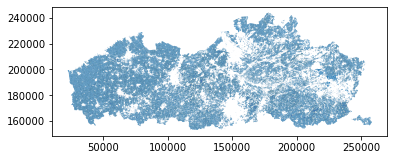

In [16]:
# projection
flandre.plot()

In [19]:
# conversion vers un crs global
flandre = flandre.to_crs('EPSG:4326')

In [21]:
# export en .geojson
flandre.to_file(os.path.join(data_dir, f'flandre.geojson'), driver = 'GeoJSON')

In [12]:
# export en .gpkg
flandre.to_file(os.path.join(data_dir, f'flandre.gpkg'), driver = 'GPKG')

In [22]:
test = flandre.head(150000)
test

,UIDN,HFDTLT,LBLHFDTLT,GEWASGROEP,OPPERVL,geometry
0,2313,2,Andere stallen en gebouwen,Landbouwinfrastructuur,1.23626,"POLYGON ((4.30803 50.90652, 4.30765 50.90684, ..."
1,9924,1,Hoofdgebouwen,Landbouwinfrastructuur,0.29925,"POLYGON ((4.50576 51.05305, 4.50602 51.05309, ..."
2,20514,9710,Meerjarige fruitteelten (appel),Fruit en Noten,10.03400,"POLYGON ((4.98265 51.31230, 4.98327 51.31129, ..."
3,28335,1,Hoofdgebouwen,Landbouwinfrastructuur,1.98594,"POLYGON ((4.62965 51.20000, 4.62928 51.20003, ..."
4,36484,2,Andere stallen en gebouwen,Landbouwinfrastructuur,0.68225,"POLYGON ((4.73420 51.37271, 4.73429 51.37278, ..."
...,...,...,...,...,...,...
149995,3730753,60,Grasland,Grasland,16.75619,"POLYGON ((4.23547 50.99731, 4.23548 50.99730, ..."
149996,3730754,9710,Meerjarige fruitteelten (appel),Fruit en Noten,7.80809,"POLYGON ((5.26153 50.81619, 5.26174 50.81594, ..."
149997,3730755,60,Grasland,Grasland,6.10640,"POLYGON ((3.23508 51.10597, 3.23518 51.10595, ..."
149998,3730756,60,Grasland,Grasland,11.27810,"POLYGON ((3.23624 51.10627, 3.23615 51.10596, ..."


In [23]:
test.to_file(os.path.join(data_dir, f'test.geojson'), driver = 'GeoJSON')